### Imports

In [1]:
import sys
from pathlib import Path
import importlib.util
import matplotlib.pyplot as plt
import pandas as pd
from kedro_datasets.pandas.csv_dataset import CSVDataset
from kedro.framework.project import configure_project
from kedro.framework.session import KedroSession
import random


[07/21/25 06:36:23] INFO     Using                                                                  ]8;id=432119;file:///usr/local/lib/python3.12/dist-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=457434;file:///usr/local/lib/python3.12/dist-packages/kedro/framework/project/__init__.py#272\272]8;;\
                             '/usr/local/lib/python3.12/dist-packages/kedro/framework/project/rich_                
                             logging.yml' as logging configuration.                                                

### Setze scr_path des Kedro Projets

In [2]:
# src-Pfad bestimmen (Jupyter: Path.cwd() → /workspace/scaniakedro/notebooks)
project_root = Path.cwd().parents[0]  # /workspace/scaniakedro
src_path = project_root / "src"
print("src_path:", src_path)
print("src_path exists:", src_path.exists())

# src GANZ OBEN ins sys.path einfügen
if str(src_path) != sys.path[0]:
    sys.path.insert(0, str(src_path))

print("sys.path[0]:", sys.path[0])
print("Findet scaniakedro:", importlib.util.find_spec("scaniakedro") is not None)


src_path: /workspace/scaniakedro/src
src_path exists: True
sys.path[0]: /workspace/scaniakedro/src
Findet scaniakedro: True


### raw_date_loading Pipeline ausführen

In [3]:
configure_project("scaniakedro")

with KedroSession.create() as session:
    context = session.load_context()
    run_result = session.run(pipeline_name="raw_data_loading")
    print(run_result)
    print("Catalog datasets:", context.catalog.list())
    raw_data = run_result["raw_datasets"]  # <-- direkt aus dem Pipeline-Output!
    print(raw_data)

[07/21/25 06:36:24] INFO     Kedro project scaniakedro                                               ]8;id=237485;file:///usr/local/lib/python3.12/dist-packages/kedro/framework/session/session.py\session.py]8;;\:]8;id=564230;file:///usr/local/lib/python3.12/dist-packages/kedro/framework/session/session.py#329\329]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=904404;file:///usr/local/lib/python3.12/dist-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=728281;file:///usr/local/lib/python3.12/dist-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[07/21/25 06:36:25] INFO     Using synchronous mode for loading and saving data. Use the    ]8;id=48303;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/sequential_runner.py\sequential_runner.py]8;;\:]8;id=787846;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/sequential_runner.py#68\68]8;;\
                             --async flag for potential performance gains.                                         
                             https://docs.kedro.org/en/stable/nodes_and_pipelines/run_a_pip                        
                             eline.html#load-and-save-asynchronously                                               

                    INFO     Loading data from train_specifications (CSVDataset)...             ]8;id=306114;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=809238;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from train_operational_readouts (CSVDataset)...       ]8;id=823639;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=628991;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

[07/21/25 06:36:38] INFO     Loading data from train_tte (CSVDataset)...                        ]8;id=127382;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=670054;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from validation_specifications (CSVDataset)...        ]8;id=822985;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=125525;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from validation_operational_readouts (CSVDataset)...  ]8;id=36327;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=66863;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

[07/21/25 06:36:40] INFO     Loading data from validation_labels (CSVDataset)...                ]8;id=930343;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=245974;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from test_specifications (CSVDataset)...              ]8;id=329477;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=996228;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from test_operational_readouts (CSVDataset)...        ]8;id=273800;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=840627;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

[07/21/25 06:36:42] INFO     Loading data from test_labels (CSVDataset)...                      ]8;id=273932;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=971365;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Running node: load_all_raw_data_node: load_all_raw_data() ->               ]8;id=799248;file:///usr/local/lib/python3.12/dist-packages/kedro/pipeline/node.py\node.py]8;;\:]8;id=228710;file:///usr/local/lib/python3.12/dist-packages/kedro/pipeline/node.py#370\370]8;;\

                    INFO     Saving data to raw_datasets (MemoryDataset)...                     ]8;id=648742;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=507307;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#445\445]8;;\

[07/21/25 06:36:43] INFO     Completed node: load_all_raw_data_node                                   ]8;id=799362;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py\runner.py]8;;\:]8;id=555665;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py#250\250]8;;\

                    INFO     Completed 1 out of 1 tasks                                               ]8;id=130036;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py\runner.py]8;;\:]8;id=400965;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py#251\251]8;;\

                    INFO     Pipeline execution completed successfully in 18.1 sec.                   ]8;id=668731;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py\runner.py]8;;\:]8;id=381198;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py#135\135]8;;\

                    INFO     Loading data from raw_datasets (MemoryDataset)...                  ]8;id=416265;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=390404;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

{'raw_datasets': {'train': {'spec':        vehicle_id Spec_0 Spec_1 Spec_2 Spec_3 Spec_4 Spec_5 Spec_6 Spec_7
0               0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0
1               2   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat0   Cat1
2               3   Cat0   Cat1   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1
3               4   Cat0   Cat0   Cat2   Cat1   Cat0   Cat0   Cat0   Cat1
4               5   Cat0   Cat2   Cat2   Cat0   Cat0   Cat0   Cat0   Cat1
...           ...    ...    ...    ...    ...    ...    ...    ...    ...
23545       33639   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1   Cat4
23546       33640   Cat0  Cat14   Cat1   Cat3   Cat0   Cat0   Cat1   Cat4
23547       33641   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1   Cat4
23548       33642   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1   Cat4
23549       33643   Cat0   Cat0   Cat2   Cat0   Cat0   Cat0   Cat1   Cat4

[23550 rows x 9 columns], 'readouts':          vehicle_id  time_step      1

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=521554;file:///usr/local/lib/python3.12/dist-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=618905;file:///usr/local/lib/python3.12/dist-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

Catalog datasets: ['train_specifications', 'train_operational_readouts', 'train_tte', 'validation_specifications', 'validation_operational_readouts', 'validation_labels', 'test_specifications', 'test_operational_readouts', 'test_labels', 'raw_datasets', 'parameters']
{'train': {'spec':        vehicle_id Spec_0 Spec_1 Spec_2 Spec_3 Spec_4 Spec_5 Spec_6 Spec_7
0               0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0
1               2   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat0   Cat1
2               3   Cat0   Cat1   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1
3               4   Cat0   Cat0   Cat2   Cat1   Cat0   Cat0   Cat0   Cat1
4               5   Cat0   Cat2   Cat2   Cat0   Cat0   Cat0   Cat0   Cat1
...           ...    ...    ...    ...    ...    ...    ...    ...    ...
23545       33639   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1   Cat4
23546       33640   Cat0  Cat14   Cat1   Cat3   Cat0   Cat0   Cat1   Cat4
23547       33641   Cat0   Cat1   Cat1   Cat0  

# Anzeigen der ersten fünf Zeilen der Daten

In [4]:
for key in raw_data.keys():
    print(f"#### Key: {key} ####")
    for dataset_name, dataset in raw_data[key].items():
        print(f"Dataset: {dataset_name}, shape: {dataset.shape}")
        display(dataset.head())  # Display the first few rows of each dataset


#### Key: train ####
Dataset: spec, shape: (23550, 9)


,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,2,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
2,3,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
3,4,Cat0,Cat0,Cat2,Cat1,Cat0,Cat0,Cat0,Cat1
4,5,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1


Dataset: readouts, shape: (1122452, 107)


,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,0,11.2,167985.0,10787.0,7413813.0,2296.0,4110.0,1296420.0,1628265.0,630345.0,...,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0
1,0,11.4,167985.0,10787.0,7413813.0,2296.0,4111.0,1302855.0,1628265.0,630345.0,...,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0
2,0,19.6,331635.0,14525.0,13683604.0,2600.0,NaN,NaN,NaN,NaN,...,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0
3,0,20.2,354975.0,15015.0,14540449.0,2616.0,NaN,NaN,NaN,NaN,...,150565.0,19832.0,2522.0,12.0,1444.0,211688.0,318901.0,107745.0,19406.0,453.0
4,0,21.0,365550.0,15295.0,14966985.0,2720.0,NaN,NaN,NaN,NaN,...,155913.0,20573.0,2562.0,12.0,1445.0,213956.0,323997.0,109514.0,19535.0,454.0


Dataset: tte, shape: (23550, 3)


,vehicle_id,length_of_study_time_step,in_study_repair
0,0,510.0,0
1,2,281.8,0
2,3,293.4,0
3,4,210.0,0
4,5,360.4,0


#### Key: validation ####
Dataset: spec, shape: (5046, 9)


,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,10,Cat0,Cat0,Cat0,Cat0,Cat0,Cat1,Cat0,Cat1
1,16,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
2,18,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
3,23,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0
4,45,Cat0,Cat0,Cat0,Cat0,Cat0,Cat1,Cat0,Cat1


Dataset: readouts, shape: (196227, 107)


,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,10,3.0,46590.0,3696.0,2038959.0,1450.0,0.0,273826.0,339584.0,99834.0,...,100725.0,8026.0,855.0,15.0,495.0,91665.0,169125.0,51900.0,9362.0,0.0
1,10,7.4,127110.0,16716.0,6501456.0,4660.0,0.0,635642.0,609742.0,288036.0,...,295291.0,44312.0,7995.0,75.0,2265.0,414180.0,688891.0,258810.0,63167.0,1005.0
2,10,8.0,144015.0,19596.0,7327918.0,5230.0,0.0,654780.0,665756.0,300174.0,...,335479.0,52203.0,9421.0,75.0,2415.0,487080.0,812071.0,300735.0,77477.0,1500.0
3,10,12.0,187560.0,24264.0,9286082.0,7420.0,2647.0,831628.0,794332.0,360066.0,...,463265.0,61399.0,10727.0,75.0,2610.0,655620.0,1118116.0,403516.0,99587.0,1591.0
4,10,12.2,187575.0,24264.0,9286082.0,7420.0,NaN,NaN,NaN,NaN,...,463265.0,61400.0,10727.0,75.0,2611.0,655620.0,1118116.0,403517.0,99588.0,1592.0


Dataset: labels, shape: (5046, 2)


,vehicle_id,class_label
0,10,0
1,16,0
2,18,0
3,23,0
4,45,0


#### Key: test ####
Dataset: spec, shape: (5045, 9)


,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,1,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
1,6,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1
2,7,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1
3,9,Cat0,Cat3,Cat2,Cat1,Cat0,Cat1,Cat0,Cat1
4,11,Cat0,Cat1,Cat1,Cat0,Cat0,Cat1,Cat1,Cat0


Dataset: readouts, shape: (198140, 107)


,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,1,4.4,94410.0,7982.0,3115020.0,2625.0,1304.0,366624.0,232040.0,147104.0,...,72548.0,9696.0,1309.0,7.0,399.0,31843.0,89138.0,24101.0,5112.0,7.0
1,1,5.0,105405.0,9178.0,3467240.0,3225.0,1305.0,390896.0,252528.0,157824.0,...,83147.0,12042.0,1841.0,7.0,455.0,35749.0,106366.0,28168.0,5420.0,7.0
2,1,8.2,214440.0,23348.0,7085790.0,8010.0,4897.0,461240.0,378264.0,313016.0,...,198090.0,26099.0,4516.0,21.0,1120.0,94017.0,293462.0,85596.0,16655.0,14.0
3,1,9.8,260190.0,29120.0,8696850.0,12525.0,6513.0,493728.0,455352.0,363984.0,...,244326.0,32708.0,5714.0,49.0,1498.0,118349.0,378176.0,115130.0,24054.0,35.0
4,1,20.6,519780.0,57967.0,17379560.0,32130.0,7617.0,665120.0,818912.0,664784.0,...,500995.0,61122.0,14247.0,169.0,3788.0,222712.0,741413.0,237274.0,59636.0,639.0


Dataset: labels, shape: (5045, 2)


,vehicle_id,class_label
0,1,0
1,6,0
2,7,0
3,9,0
4,11,0


 "167",
 "272", "291", "158", "459", and "397," with 10, 10, 11, 10, 20, and 36 bins

 "171_0", "666_
0", "427_0", "837_0", "309_0", "835_0", "370_0", "100_0" are numerical counters

### Analyse der Labels

In [5]:
tte_train_df = raw_data["train"]["tte"]
labels_test_df = raw_data["test"]["labels"]
labels_validation_df = raw_data["validation"]["labels"]



#### Verteilung der Klassen als Balkendiagram

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_label_distribution_bar(label_series: pd.Series, title: str, ax=None) -> None:
    """
    Plots a horizontal bar chart showing the distribution of labels in a Pandas Series.

    Args:
        label_series (pd.Series): Series containing the labels to be plotted.
        title (str): Title of the plot.
        ax (matplotlib.axes.Axes, optional): Axes object to plot on. If None, a new figure and axes will be created.
    
    Results:
        None: Displays the plot.
    """
    counts = label_series.value_counts().sort_index()
    labels = counts.index
    total = len(label_series)
    percentages = counts / total * 100

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 4))

    palette = sns.color_palette("tab10", len(labels))

    bars = ax.barh(labels.astype(str), counts, color=palette)

    # Werte an die Balken schreiben
    for i, (bar, count, pct) in enumerate(zip(bars, counts, percentages)):
        ax.text(bar.get_width() + total * 0.005, bar.get_y() + bar.get_height()/2,
                f"{pct:.1f}%\n({count})",
                va='center', ha='left', fontsize=10)

    ax.set_title(title)
    ax.set_xlabel("Anzahl")
    ax.set_ylabel("Klasse")
    ax.invert_yaxis()  # Höchste Klasse oben
    sns.despine()

    plt.tight_layout()
    plt.show()


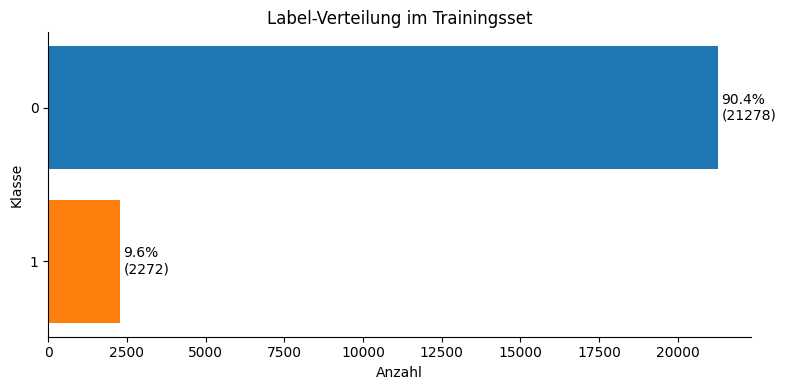

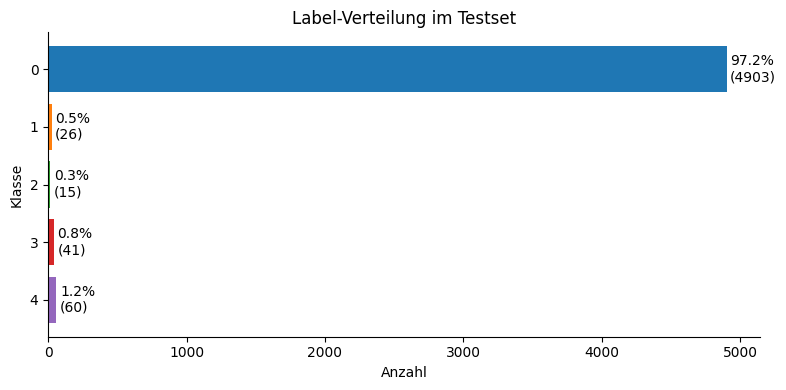

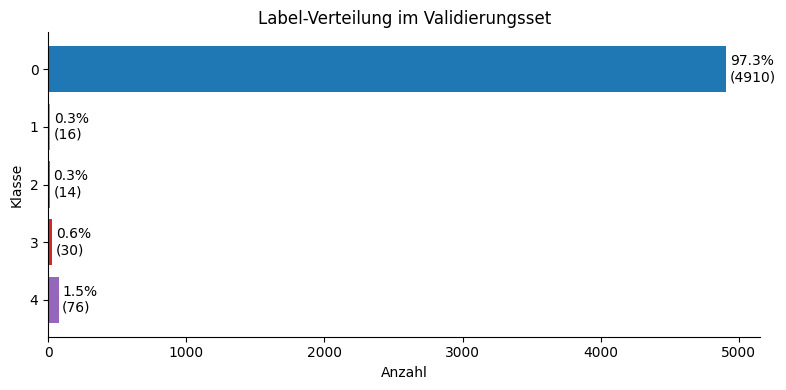

In [7]:
plot_label_distribution_bar(tte_train_df["in_study_repair"], "Label-Verteilung im Trainingsset")
plot_label_distribution_bar(labels_test_df["class_label"], "Label-Verteilung im Testset")
plot_label_distribution_bar(labels_validation_df["class_label"], "Label-Verteilung im Validierungsset")


#### Histogramm der Klassen und Anzahl der Fahrzeuge

In [8]:

def plot_observation_time_histogram(tte_df: pd.DataFrame) -> None:
    """
    Plots a histogram of observation times grouped by label (e.g., repair vs. healthy).

    Args:
        tte_df (pd.DataFrame): DataFrame containing the columns 'length_of_study_time_step' and 'in_study_repair'.

    Returns:
        None: Displays the histogram.
    """
    # Farben für Label 0 (gesund) und 1 (repariert)
    colors = {0: 'darkblue', 1: 'lightcoral'}
    
    plt.figure(figsize=(6, 4))

    # Histogramme getrennt nach Label zeichnen
    for label in sorted(tte_df["in_study_repair"].unique()):
        subset = tte_df[tte_df["in_study_repair"] == label]
        plt.hist(subset["length_of_study_time_step"], bins=150, alpha=0.8,
                 label=str(label), color=colors.get(label, 'gray'))

    plt.xlabel("Beobachtungszeit")
    plt.ylabel("Anzahl der Fahrzeuge")
    plt.title("Verteilung der Beobachtungszeit im Trainingsset")
    plt.legend(title="Label")
    plt.tight_layout()
    plt.show()


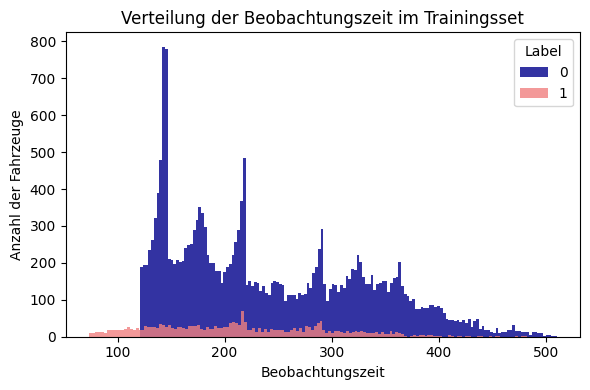

In [9]:
plot_observation_time_histogram(tte_train_df)


In [10]:
# Nur Zeilen mit Label 0 (kein Ausfall)
label_0_df = tte_train_df[tte_train_df["in_study_repair"] == 0]

# Nach Zeit sortieren und früheste 5 anzeigen
label_0_df_sorted = label_0_df.sort_values("length_of_study_time_step")
print(label_0_df_sorted.head())

       vehicle_id  length_of_study_time_step  in_study_repair
9277        13348                      121.0                0
22560       32255                      121.0                0
15650       22373                      121.0                0
22782       32562                      121.0                0
9974        14330                      121.0                0


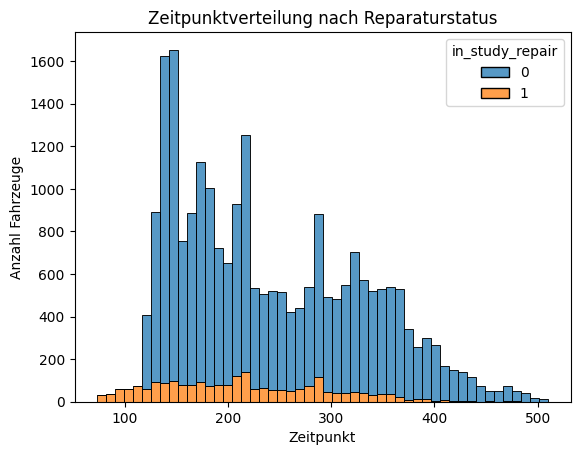

In [11]:
import seaborn as sns

sns.histplot(data=tte_train_df, x="length_of_study_time_step", hue="in_study_repair", bins=50, multiple="stack")
plt.title("Zeitpunktverteilung nach Reparaturstatus")
plt.xlabel("Zeitpunkt")
plt.ylabel("Anzahl Fahrzeuge")
plt.show()


#### Berechnung der Gini-Index und die Entropie

In [12]:
import numpy as np
from collections import Counter

def gini_index(y):
    counts = np.array(list(Counter(y).values()))
    probs = counts / counts.sum()
    return 1 - np.sum(probs ** 2)

def entropy(y):
    counts = np.array(list(Counter(y).values()))
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs + 1e-10))  # log2 für bessere Interpretierbarkeit

In [13]:
print("Gini (tte Train):", gini_index(tte_train_df["in_study_repair"]))
print("Entropie (tte Train):", entropy(tte_train_df["in_study_repair"]))
print("Gini (Labels Train):", gini_index(labels_test_df["class_label"]))
print("Entropie (Labels Train):", entropy(labels_test_df["class_label"]))
print("Gini (Labels Validation):", gini_index(labels_validation_df["class_label"]))
print("Entropie (Labels Validation):", entropy(labels_validation_df["class_label"]))

Gini (tte Train): 0.17433609116439253
Entropie (tte Train): 0.4577228417895695
Gini (Labels Train): 0.05525823583781653
Entropie (Labels Train): 0.23662140094920772
Gini (Labels Validation): 0.05289772460387798
Entropie (Labels Validation): 0.22336740226825713


### Analyse der Spezifikation der Fahrzeuge

In [14]:
spec_train = raw_data["train"]["spec"]
spec_test = raw_data["test"]["spec"]
spec_validation = raw_data["validation"]["spec"]

In [15]:

def get_random_vehicle_per_class(df: pd.DataFrame) -> dict[int, str]:
    """
    Erstellt ein Dictionary, das für jede Klasse (0–4) ein zufälliges Fahrzeug (`vehicle_id`) enthält.

    Args:
        df (pd.DataFrame): DataFrame mit Klassenlabels, enthält Spalten 'vehicle_id' und 'class_label'.
    Returns:
        dict[int, str]: Dictionary mit Klassenlabels (0–4) als Keys und jeweils einer zufälligen `vehicle_id` als Value.
    """
    result = {}
    for label in sorted(df['class_label'].unique()):
        vehicle_ids = df[df['class_label'] == label]['vehicle_id'].tolist()
        if vehicle_ids:
            result[label] = random.choice(vehicle_ids)
    return result


In [16]:
vehicle_dict = get_random_vehicle_per_class(labels_test_df)

print("Zufällige Fahrzeuge pro Klasse (Testset):")
for label, vehicle_id in vehicle_dict.items():
    print(f"Klasse {label}: Fahrzeug {vehicle_id}")

Zufällige Fahrzeuge pro Klasse (Testset):
Klasse 0: Fahrzeug 18253
Klasse 1: Fahrzeug 5712
Klasse 2: Fahrzeug 17508
Klasse 3: Fahrzeug 26528
Klasse 4: Fahrzeug 11922


### Histogram der Spezifikation Daten

#### Histogram TrainingTest/Validation/Test

In [28]:
def plot_individual_spec_distributions(
    spec_train: pd.DataFrame,
    spec_val: pd.DataFrame,
    spec_test: pd.DataFrame
) -> None:
    """
    Plottet für jede Spezifikationsspalte (beginnend mit 'Spec_') ein separates Balkendiagramm
    zur Verteilung der Ausprägungen in Train, Val und Test.

    Args:
        spec_train (pd.DataFrame): Trainings-Spezifikationen.
        spec_val (pd.DataFrame): Validierungs-Spezifikationen.
        spec_test (pd.DataFrame): Test-Spezifikationen.

    Returns:
        None: Zeigt für jede 'Spec_'-Spalte einen Plot.
    """
    spec_cols = [col for col in spec_train.columns if col.startswith("Spec_")]

    for col in spec_cols:
        # Relative Häufigkeit berechnen
        train_counts = spec_train[col].value_counts(normalize=True)
        val_counts = spec_val[col].value_counts(normalize=True)
        test_counts = spec_test[col].value_counts(normalize=True)

        # Alle Kategorien, die irgendwo vorkommen
        all_categories = sorted(set(train_counts.index)
                                .union(val_counts.index)
                                .union(test_counts.index))

        x = range(len(all_categories))
        width = 0.25

        plt.figure(figsize=(10, 4))
        plt.bar(
            [i - width for i in x],
            [train_counts.get(cat, 0) for cat in all_categories],
            width=width,
            label="Train Spec",
            color="darkblue"
        )
        plt.bar(
            x,
            [val_counts.get(cat, 0) for cat in all_categories],
            width=width,
            label="Val Spec",
            color="gray"
        )
        plt.bar(
            [i + width for i in x],
            [test_counts.get(cat, 0) for cat in all_categories],
            width=width,
            label="Test Spec",
            color="firebrick"
        )

        plt.title(f"Verteilung der Spezifikation: {col}")
        plt.xlabel("Kategorie")
        plt.ylabel("Proportion")
        plt.xticks(ticks=x, labels=all_categories, rotation=45)
        plt.ylim(0, 1)
        plt.legend()
        plt.tight_layout()
        plt.show()

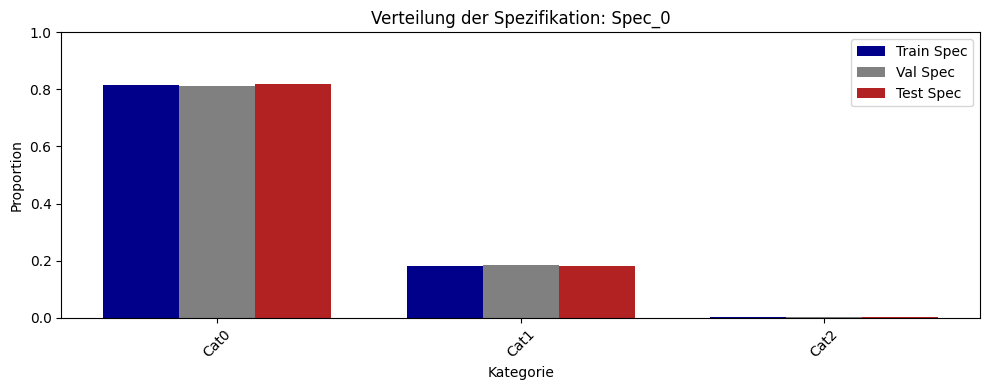

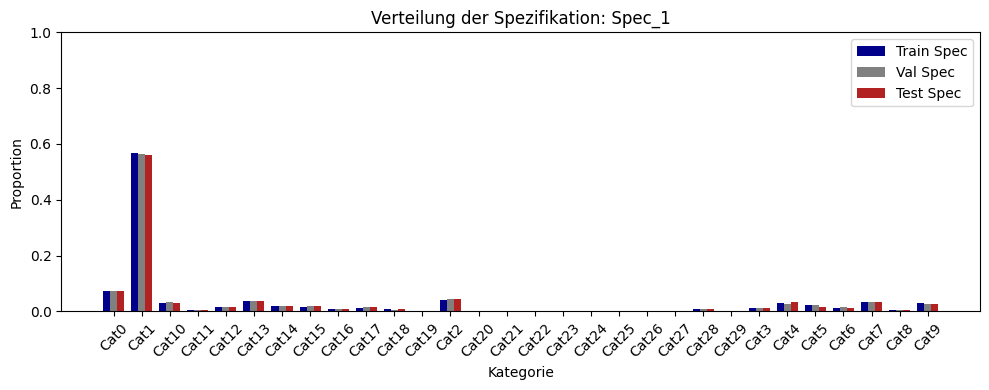

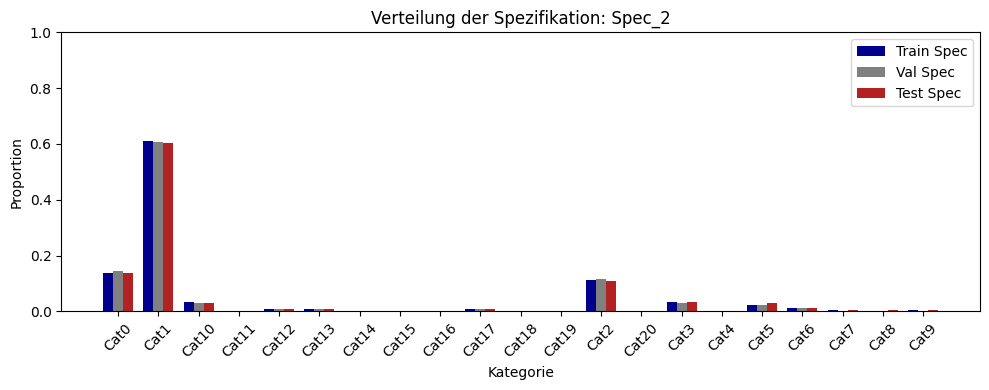

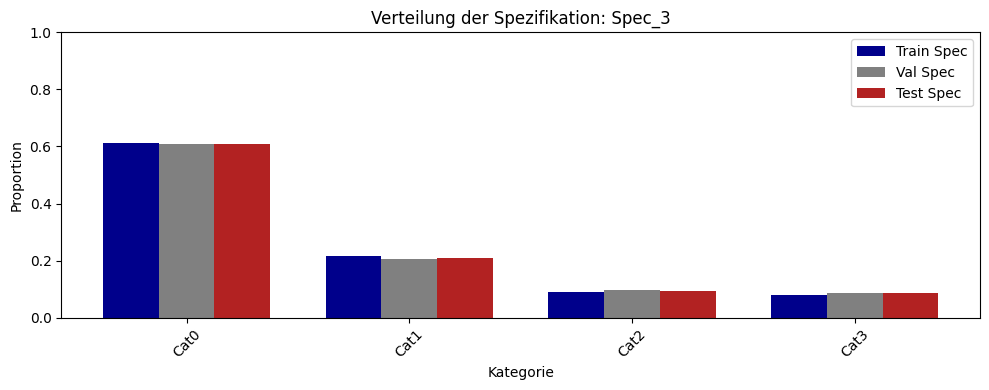

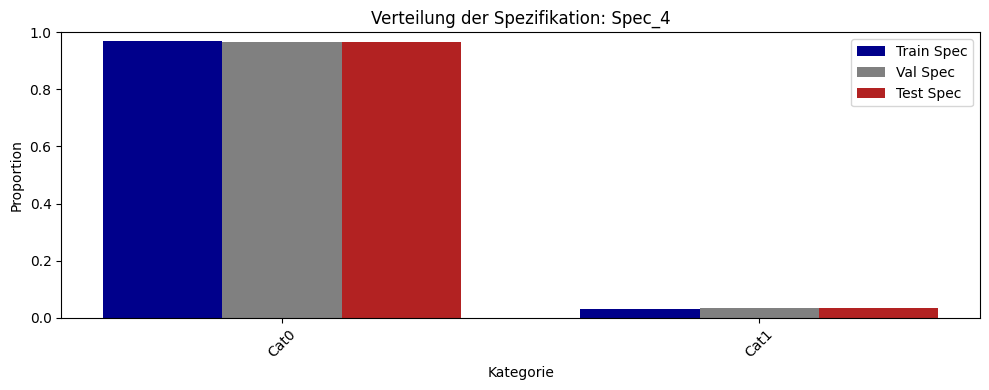

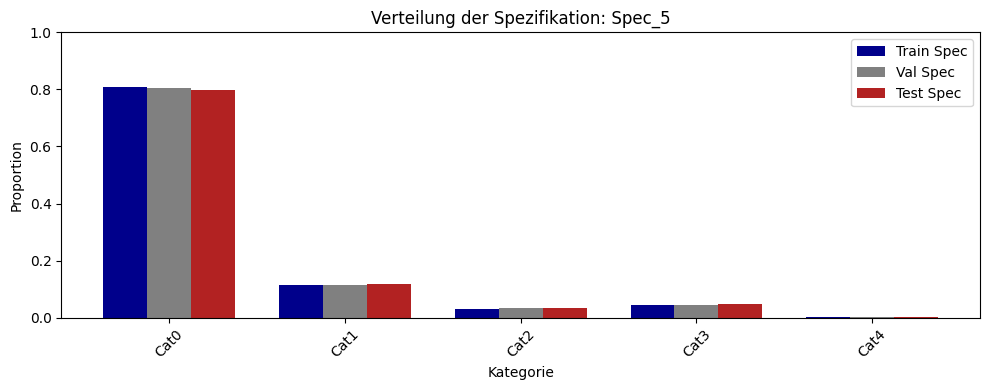

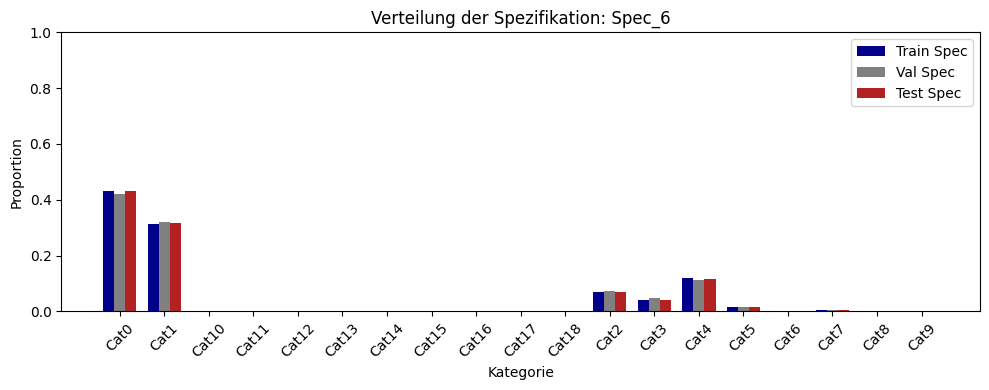

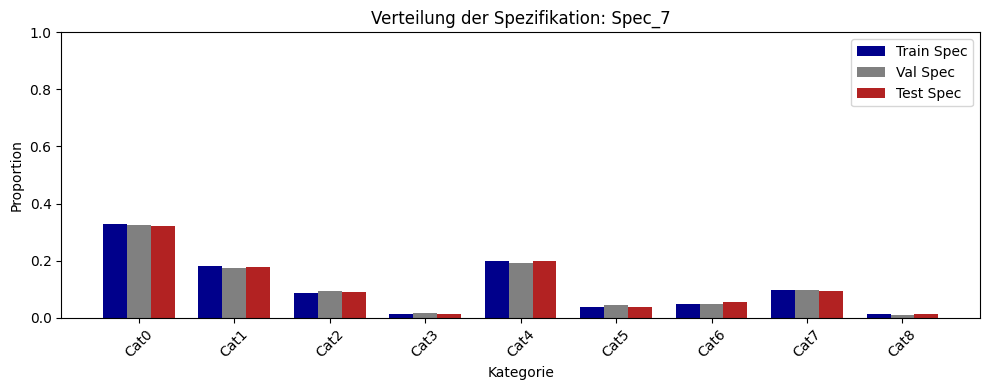

In [29]:
plot_individual_spec_distributions(
    spec_train,
    spec_validation,
    spec_test
)


#### Histogram der Train Labels

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_spec_distributions_by_label(
    spec_df: pd.DataFrame,
    labels_df: pd.DataFrame,
    label_column: str = "in_study_repair"
) -> None:
    """
    Visualisiert die Spezifikationsverteilungen (Spec_*) für beliebig viele Klassenlabels.
    Die Daten werden über 'vehicle_id' gemerged. Für jede Spezifikationsspalte wird ein
    Balkendiagramm erzeugt, das die relative Häufigkeit pro Kategorie und Label zeigt.

    Args:
        spec_df (pd.DataFrame): DataFrame mit Spezifikationsdaten (enthält vehicle_id).
        labels_df (pd.DataFrame): DataFrame mit Labels (enthält vehicle_id und Labelspalte).

    Returns:
        None: Zeigt für jede Spezifikationsspalte ein separates Balkendiagramm.
    """
    # Merge über vehicle_id (join inner)
    merged_df = pd.merge(spec_df, labels_df[['vehicle_id', label_column]], on='vehicle_id', how='inner')

    # Nur Spezifikationsspalten verwenden
    spec_cols = [col for col in merged_df.columns if col.startswith("Spec_")]

    # Automatische Farbcodierung nach Anzahl Labels
    unique_labels = sorted(merged_df[label_column].unique())
    num_labels = len(unique_labels)
    color_palette = plt.cm.get_cmap("tab10", num_labels)

    for col in spec_cols:
        plt.figure(figsize=(10, 4))

        # Verteilungen je Kategorie und Label
        proportions = (
            merged_df.groupby(label_column)[col]
            .value_counts(normalize=True)
            .unstack(fill_value=0)
        )

        x = range(len(proportions.columns))
        width = 0.8 / num_labels  # dynamische Balkenbreite

        for i, label in enumerate(proportions.index):
            values = proportions.loc[label].values
            plt.bar(
                [pos + (i - num_labels / 2) * width + width / 2 for pos in x],
                values,
                width=width,
                label=f"Label {label}",
                color=color_palette(i)
            )

        plt.title(f"Verteilung von {col} nach Label")
        plt.xlabel("Kategorie")
        plt.ylabel("Proportion")
        plt.xticks(ticks=range(len(proportions.columns)), labels=proportions.columns, rotation=45)
        plt.ylim(0, 1)
        plt.legend(title="Label")
        plt.tight_layout()
        plt.show()


[07/21/25 07:03:23] WARNING  /tmp/ipykernel_86001/234186.py:30: MatplotlibDeprecationWarning: The   ]8;id=311352;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=416035;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               color_palette = plt.cm.get_cmap("tab10", num_labels)                                
                                                                                                                   

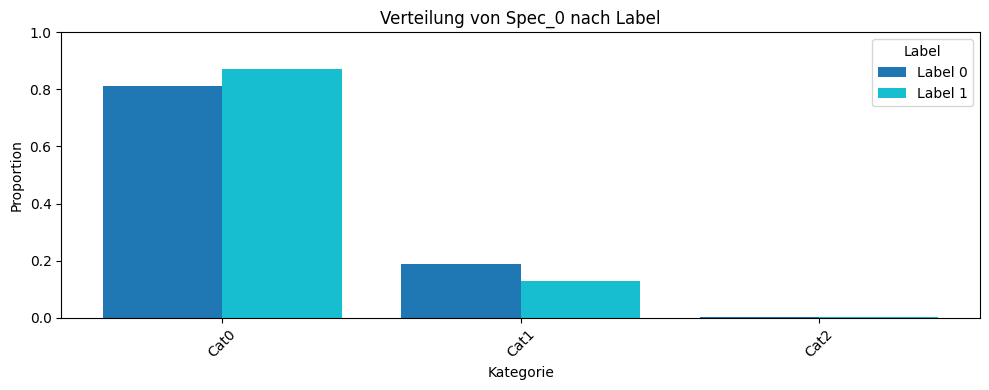

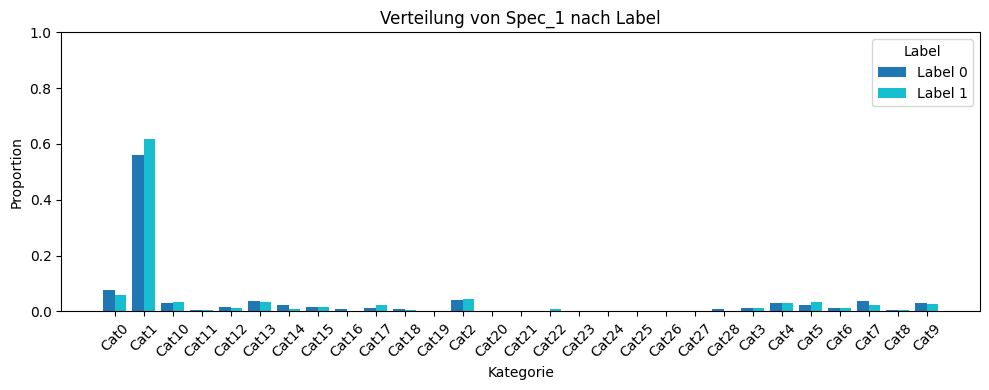

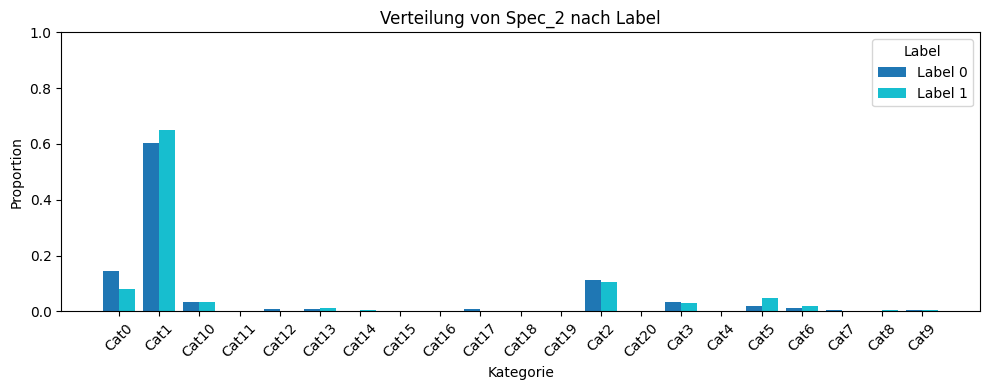

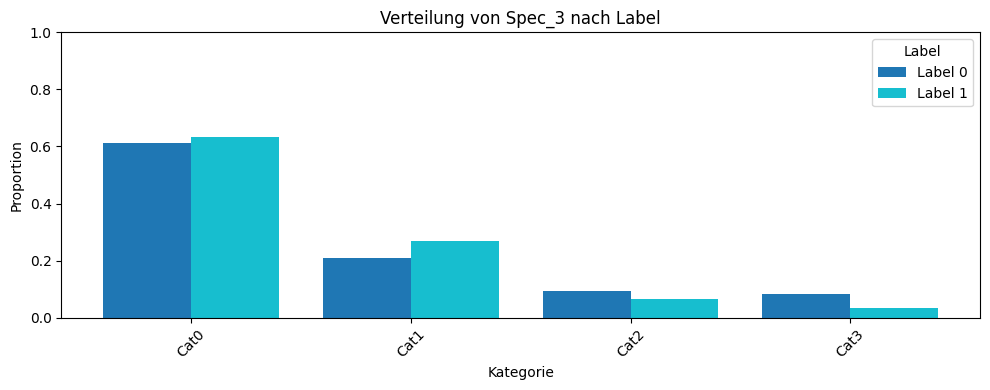

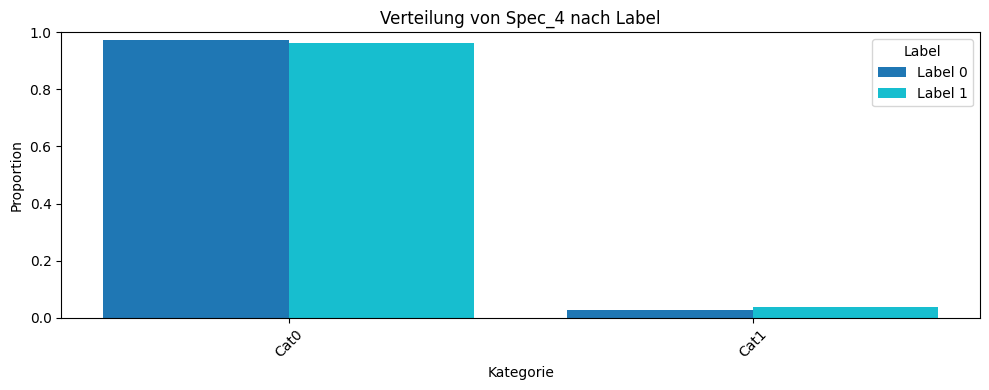

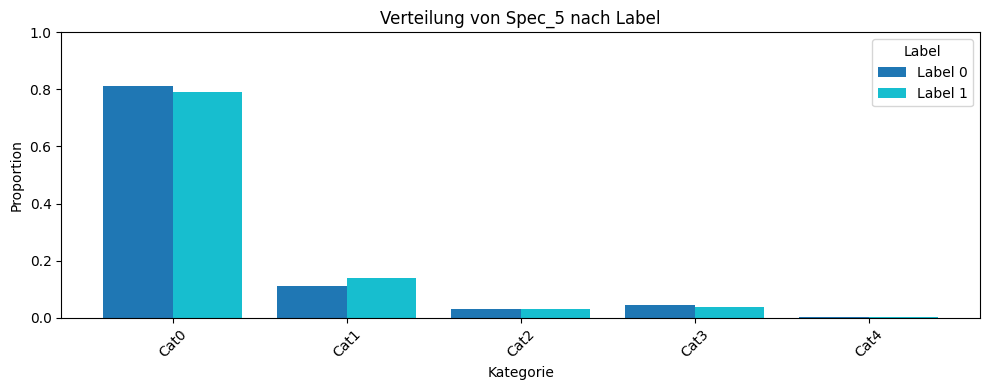

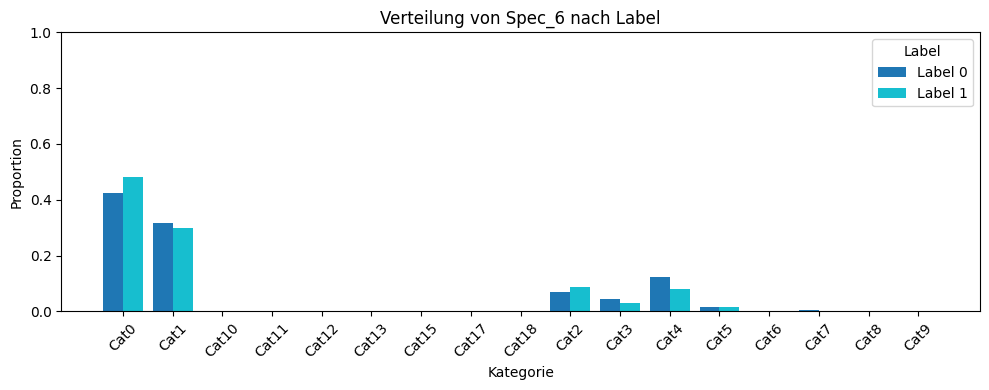

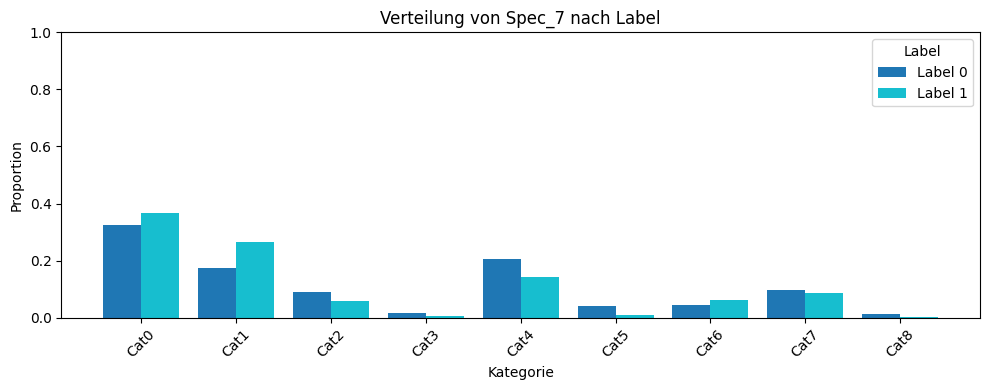

In [58]:
plot_spec_distributions_by_label(
    spec_train,
    tte_train_df,
    label_column="in_study_repair"
)


### Analyse der Readout Daten

#### Histogram der readout Daten 

#### Histograme aus den Histogram Daten

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_variable_histogram_for_vehicle(df: pd.DataFrame, vehicle_id: str, variable_id: int, label: int) -> None:
    """
    Plottet ein Histogramm über alle Bins eines bestimmten Sensors (Variable) für ein gegebenes Fahrzeug,
    inklusive Anzeige der zugehörigen Klassen-Label.

    Args:
        df (pd.DataFrame): DataFrame mit Histogramm-Daten (z. B. operational_readouts).
        vehicle_id (str): ID des Fahrzeugs, das geplottet werden soll.
        variable_id (int): Nummer der Variable (z. B. 167).
        label (int): Klassenlabel des Fahrzeugs (z. B. 0–4).

    Returns:
        None: Zeigt das Plot-Fenster an.
    """
    # Alle Spalten dieser Variable sammeln (z. B. '167_0' bis '167_9')
    bin_cols = [col for col in df.columns if col.startswith(f"{variable_id}_")]
    
    # Nur Daten für dieses Fahrzeug
    vehicle_data = df[df["vehicle_id"] == vehicle_id]

    # Histogramm berechnen (über alle Zeitpunkte aufsummiert)
    bin_sums = vehicle_data[bin_cols].sum()

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(bin_sums.index, bin_sums.values, color="darkblue")
    plt.title(f"Histogram of variable {variable_id} of vehicle {vehicle_id} (Label: {label})")
    plt.xlabel(f"Histogram bins for variable {variable_id}")
    plt.ylabel("Values")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


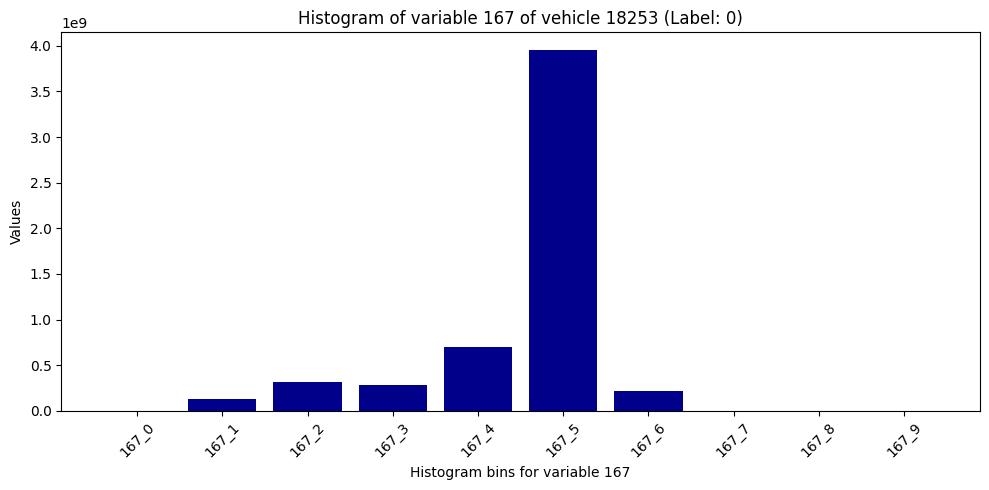

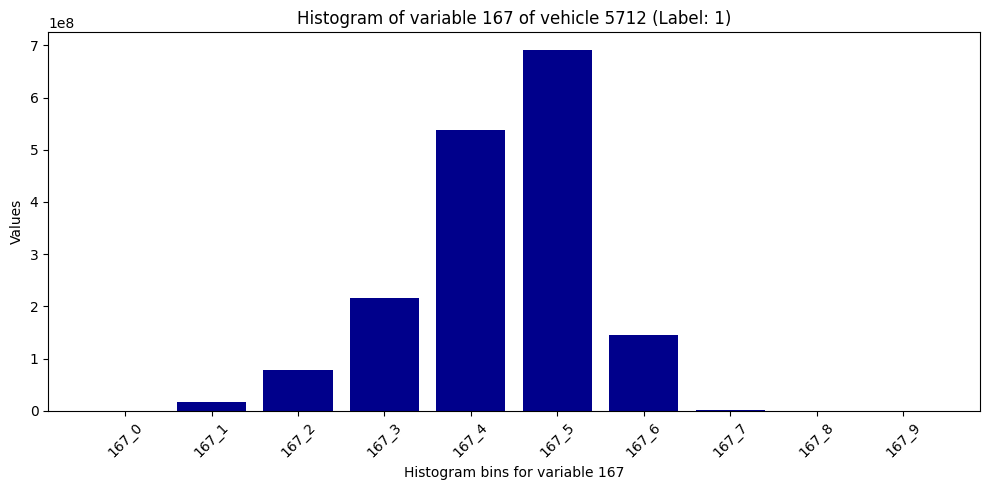

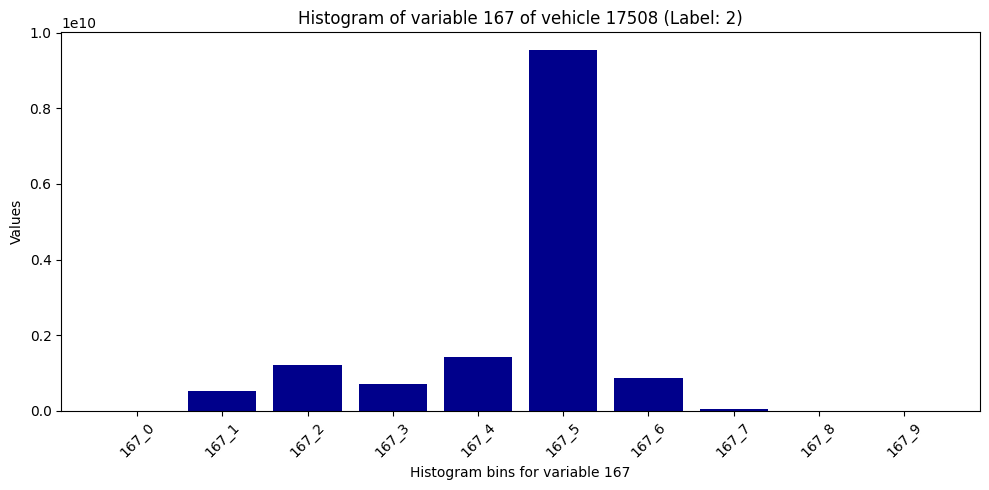

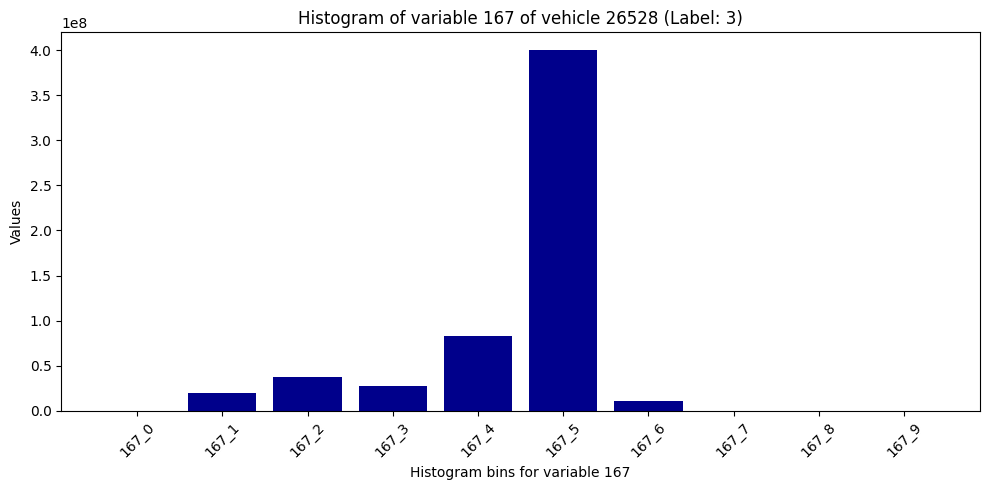

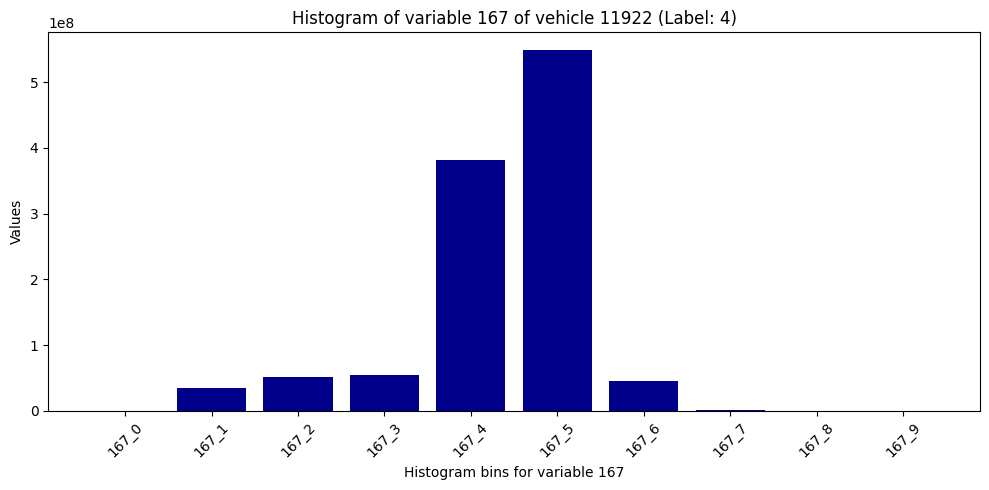

In [20]:
histogram_data_columns = [167, 272, 291, 158, 459, 397]

for label, veh_id in vehicle_dict.items():
    plot_variable_histogram_for_vehicle(raw_data["test"]["readouts"], veh_id, variable_id=167, label=label)
